In [1]:
%autosave 20
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Autosaving every 20 seconds


#### A single point plotted in the graph is the average of three readings. The y-axis of all the graphs is in seconds.

####  SC, EDC and IoTD are hosted in a Raspberry Pi

####  CDC is an AWS system

In [2]:
def benchPlot(df,title,c,x="Number of records"):
    print(df.mean(axis=0))
    plt.plot(df.mean(axis=0),marker='o',color=c)
    plt.xlabel(x)
    plt.ylabel("Seconds")
    plt.title(title)
    plt.grid()
    plt.show()

1    1.944000
2    1.838000
3    1.796667
4    1.783000
5    2.220000
dtype: float64


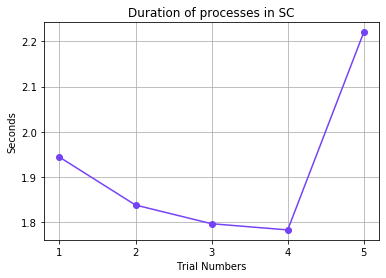

In [3]:
SC={'1':[1.74,1.785,2.307],'2':[1.614,2.138,1.762],'3':[1.95,1.75,1.69],'4':[1.829,1.79,1.73],'5':[2.13,2.24,2.29]}
df=pd.DataFrame(SC)
benchPlot(df,"Duration of processes in SC","#7542f5","Trial Numbers")

 The trial number refers to the specific trial conducted. 

In [4]:
def combined_benchmark(df1,df2,title,l1,l2):
    labels=[l1,l2]
    for df in df1,df2:
        print(df.mean(axis=0))
        plt.plot(df.mean(axis=0),marker='o')
        plt.xlabel("Number of Records")
        plt.ylabel("Seconds")
#     plt.title(title)
    plt.legend(labels)
    plt.grid()
    plt.show()

1000       0.743000
5000       2.757000
10000      9.531667
20000     34.727333
40000    120.831333
dtype: float64
1000       5.579000
5000       9.573667
10000     18.806667
20000     38.651333
40000    123.594000
dtype: float64


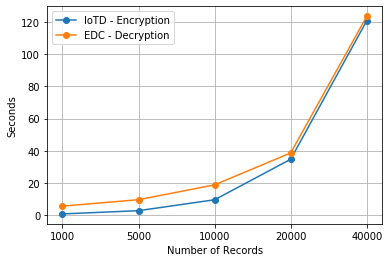

In [5]:
encryption_IoTD={'1000':[0.724,0.708,0.797],'5000':[2.522,2.687,3.062],'10000':[9.059,9.819,9.717],
                    '20000':[34.845,34.918,34.419],'40000':[116.331,122.79,123.373]}
decryption_EDC={'1000':[5.861,5.563,5.313],'5000':[10.722,9.637,8.362],'10000':[21.942,17.119,17.359],
                    '20000':[43.113,36.537,36.304],'40000':[119.069,125.638,126.075]}
df1=pd.DataFrame(encryption_IoTD)
df2=pd.DataFrame(decryption_EDC)
combined_benchmark(df1,df2,"Duration of Encryption and Decryption","IoTD - Encryption","EDC - Decryption")

The benchmarking in encryption is the time between encrypting and publishing of the first record to the last record. The decryption time is the duration between subscribing and decrypting the first record to the last record. As the number of records increases, the time requires for encryption/decryption also increase

1000       0.752000
5000       2.598667
10000      9.434000
20000     34.158000
40000    116.379000
dtype: float64
1000       2.956333
5000       4.829667
10000     12.209667
20000     36.374333
40000    118.567333
dtype: float64


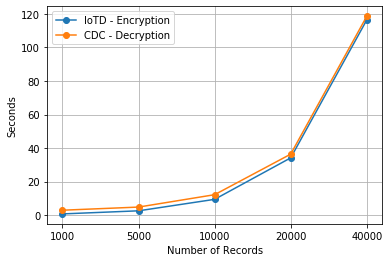

In [6]:
encryption_IoTD={'1000':[0.661,0.798,0.797],'5000':[2.603,2.571,2.622],'10000':[9.22,8.97,10.112],
                    '20000':[34.88,33.651,33.943],'40000':[115.072,116.949,117.116]}
decryption_CDC={'1000':[2.703,2.961,3.205],'5000':[4.712,4.816,4.961],'10000':[11.2,12.25,13.179],
                    '20000':[36.78,36.985,35.358],'40000':[116.825,119.361,119.516]}
df1=pd.DataFrame(encryption_IoTD)
df2=pd.DataFrame(decryption_CDC)
combined_benchmark(df1,df2,"Duration of Encryption and Decryption","IoTD - Encryption","CDC - Decryption")

The time duration of encryption and decryption has very less gap because CDC has better processing speed, and the decryption works faster. 

1000      0.865000
5000      1.821667
10000     3.160000
20000     5.982000
40000    11.849000
dtype: float64
1000     0.150333
5000     0.273000
10000    0.407667
20000    0.713333
40000    1.391667
dtype: float64


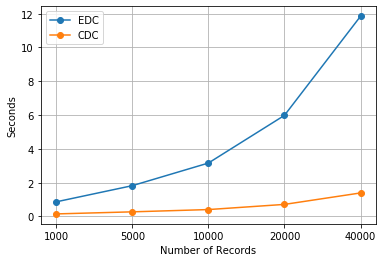

In [7]:
ML_EDC={'1000':[0.897,0.924,0.774],'5000':[1.815,1.81,1.84],'10000':[3.16,3.161,3.159],'20000':[5.976,5.98,5.99],'40000':[12.73,11.404,11.413]}
ML_CDC={'1000':[0.224,0.113,0.114],'5000':[0.353,0.233,0.233],'10000':[0.401,0.409,0.413],'20000':[0.736,0.696,0.708],'40000':[1.41,1.415,1.35]}
df1=pd.DataFrame(ML_EDC)
df2=pd.DataFrame(ML_CDC)
combined_benchmark(df1,df2,"Duration of Data Analysis in EDC and CDC","EDC","CDC")

It is quite evident that the time to process the same amount of data in the CDC is quite less than that of EDC

1000       9.000333
5000      15.832000
10000     27.410667
20000     48.407667
40000    137.696333
dtype: float64
1000       5.861667
5000       7.917333
10000     15.020000
20000     39.539333
40000    122.561667
dtype: float64


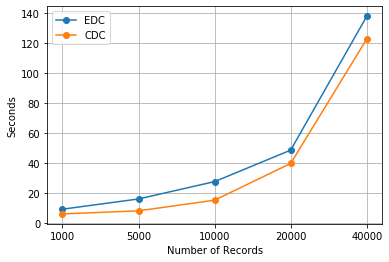

In [8]:
full_bench_mark_EDC={'1000':[9.457,8.821,8.723],'5000':[18.262,15.745,13.489],'10000':[30.021,26.681,25.53],
                    '20000':[53.65,45.9,45.673],'40000':[133.96,139.08,140.049]}
full_bench_mark_CDC={'1000':[6.065,5.79,5.73],'5000':[8.104,8.118,7.53],'10000':[14.219,14.631,16.21],
                    '20000':[40.27,39.043,39.305],'40000':[121.42,123.25,123.015]}
df1=pd.DataFrame(full_bench_mark_EDC)
df2=pd.DataFrame(full_bench_mark_CDC)
combined_benchmark(df1,df2,"Full Benchmark with EDC and CDC","EDC","CDC")

There is a clear difference in time taken in EDC and CDC. It is mostly due to the time required for the ML process.